Install the packages

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Load the dataset

In [12]:
# Load the uploaded Excel file
# Read the Excel file into a pandas DataFrame
data=pd.read_csv('/Users/chibu/Documents/Lambton DSMM/Term 4 WIL project/WK12/Toronto_FC_BMO_Field_Equipment_Predictive_Maintenance_Data_Claude.csv')

# Display the first 5 entries
data.head()

,Equipment ID,Equipment Type,Purchase Date,Last Maintenance Date,Maintenance Status,Equipment Cost (CAD),Usage Hours,Location,Supplier,Warranty Expiry Date,Next Maintenance Due Date,Usage Hours Since Last Maintenance,Time Since Last Maintenance (Days),Maintenance Frequency (Times),Failure History,Condition Rating,Failure Prediction (Target)
0,EQ00001,Seats,2017-09-06 00:00:00,2017-12-31 00:00:00,Needs Repair,45481.65,6835,Main Field,Turf Solutions,2017-11-24 00:00:00,2015-10-18 00:00:00,6682,2436,3,0,5,0
1,EQ00002,Cameras,2020-02-07 00:00:00,2019-09-22 00:00:00,Good,17821.95,2947,East Stand,Lighting Masters,2017-10-21 00:00:00,2016-02-18 00:00:00,2929,1806,6,0,7,0
2,EQ00003,Score Display,2016-04-11 00:00:00,2022-07-14 00:00:00,Replaced,45589.76,5231,East Stand,Audio Visual Experts,2016-10-03 00:00:00,2018-06-07 00:00:00,5178,780,5,0,9,0
3,EQ00004,Cameras,2023-01-26 00:00:00,2018-04-21 00:00:00,Good,23713.39,6316,West Stand,Sports Equipment Co.,2016-01-20 00:00:00,2017-07-30 00:00:00,6224,2325,1,0,7,0
4,EQ00005,Score Display,2021-02-25 00:00:00,2021-07-01 00:00:00,Replaced,35567.43,4534,North Stand,Goalkeepers Inc.,2017-02-10 00:00:00,2018-07-10 00:00:00,4499,1158,6,1,9,0


In [13]:
# Generate descriptive statistics for the numerical columns in the dataframe
data.describe()

,Equipment Cost (CAD),Usage Hours,Usage Hours Since Last Maintenance,Time Since Last Maintenance (Days),Maintenance Frequency (Times),Failure History,Condition Rating,Failure Prediction (Target)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25206.828659,5029.961100,4930.712000,1761.861100,5.009900,0.104000,5.640100,0.352100
std,14359.341837,2872.785231,2873.240365,1026.169145,2.593043,0.305276,2.892786,0.477649
min,500.590000,0.000000,-187.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,12730.497500,2544.000000,2450.000000,877.000000,3.000000,0.000000,4.000000,0.000000
50%,25165.410000,5013.000000,4918.000000,1748.000000,5.000000,0.000000,7.000000,0.000000
75%,37750.760000,7517.250000,7419.000000,2656.000000,7.000000,0.000000,8.000000,1.000000
max,49991.800000,9999.000000,9972.000000,3531.000000,9.000000,1.000000,9.000000,1.000000


DATA CLEANING

In [14]:
# Check for missing values in the DataFrame (merge null and missing value check)
missing_values = data.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Equipment ID                          0
Equipment Type                        0
Purchase Date                         0
Last Maintenance Date                 0
Maintenance Status                    0
Equipment Cost (CAD)                  0
Usage Hours                           0
Location                              0
Supplier                              0
Warranty Expiry Date                  0
Next Maintenance Due Date             0
Usage Hours Since Last Maintenance    0
Time Since Last Maintenance (Days)    0
Maintenance Frequency (Times)         0
Failure History                       0
Condition Rating                      0
Failure Prediction (Target)           0
dtype: int64


In [15]:
# Check the data types of each column in the DataFrame
data_types = data.dtypes
print("Data types before conversion:\n", data_types)

Data types before conversion:
 Equipment ID                           object
Equipment Type                         object
Purchase Date                          object
Last Maintenance Date                  object
Maintenance Status                     object
Equipment Cost (CAD)                  float64
Usage Hours                             int64
Location                               object
Supplier                               object
Warranty Expiry Date                   object
Next Maintenance Due Date              object
Usage Hours Since Last Maintenance      int64
Time Since Last Maintenance (Days)      int64
Maintenance Frequency (Times)           int64
Failure History                         int64
Condition Rating                        int64
Failure Prediction (Target)             int64
dtype: object


In [16]:
# Convert specified columns to datetime objects
date_columns = ['Purchase Date', 'Last Maintenance Date', 'Warranty Expiry Date', 'Next Maintenance Due Date']
for column in date_columns:
    data[column] = pd.to_datetime(data[column], errors='coerce')

In [17]:
# Calculate equipment age in years based on 'Purchase Date'
data['Equipment Age'] = (pd.Timestamp.today() - data['Purchase Date']).dt.days // 365


# Calculate time since last maintenance based on 'Last Maintenance Date'
data['Days Since Last Maintenance'] = (pd.Timestamp.today() - data['Last Maintenance Date']).dt.days

# Display the new calculated columns
print(data[['Equipment Age', 'Days Since Last Maintenance']].head())

   Equipment Age  Days Since Last Maintenance
0              7                         2497
1              4                         1867
2              8                          841
3              1                         2386
4              3                         1219


FEATURE EXTRACTION

In [18]:
# prompt: extract month names, days from Purchase date and last maintenance

# Extract month names from 'Purchase Date'
data['Purchase Month'] = data['Purchase Date'].dt.month_name()

# Extract days from 'Purchase Date'
data['Purchase Day'] = data['Purchase Date'].dt.day

# Extract month names from 'Last Maintenance Date'
data['Last Maintenance Month'] = data['Last Maintenance Date'].dt.month_name()

# Extract days from 'Last Maintenance Date'
data['Last Maintenance Day'] = data['Last Maintenance Date'].dt.day

print(data[['Purchase Month', 'Purchase Day', 'Last Maintenance Month', 'Last Maintenance Day']].head())


  Purchase Month  Purchase Day Last Maintenance Month  Last Maintenance Day
0      September             6               December                    31
1       February             7              September                    22
2          April            11                   July                    14
3        January            26                  April                    21
4       February            25                   July                     1


VISUALIZE

In [20]:
# Calculate 'Age of Equipment' in days
data['Age of Equipment (Days)'] = (pd.Timestamp.now() - data['Purchase Date']).dt.days

# Calculate 'Days Until Next Maintenance' in days
data['Days Until Next Maintenance'] = (data['Next Maintenance Due Date'] - pd.Timestamp.now()).dt.days

In [21]:
data.head()

,Equipment ID,Equipment Type,Purchase Date,Last Maintenance Date,Maintenance Status,Equipment Cost (CAD),Usage Hours,Location,Supplier,Warranty Expiry Date,...,Condition Rating,Failure Prediction (Target),Equipment Age,Days Since Last Maintenance,Purchase Month,Purchase Day,Last Maintenance Month,Last Maintenance Day,Age of Equipment (Days),Days Until Next Maintenance
0,EQ00001,Seats,2017-09-06,2017-12-31,Needs Repair,45481.65,6835,Main Field,Turf Solutions,2017-11-24,...,5,0,7,2497,September,6,December,31,2613,-3303
1,EQ00002,Cameras,2020-02-07,2019-09-22,Good,17821.95,2947,East Stand,Lighting Masters,2017-10-21,...,7,0,4,1867,February,7,September,22,1729,-3180
2,EQ00003,Score Display,2016-04-11,2022-07-14,Replaced,45589.76,5231,East Stand,Audio Visual Experts,2016-10-03,...,9,0,8,841,April,11,July,14,3126,-2340
3,EQ00004,Cameras,2023-01-26,2018-04-21,Good,23713.39,6316,West Stand,Sports Equipment Co.,2016-01-20,...,7,0,1,2386,January,26,April,21,645,-2652
4,EQ00005,Score Display,2021-02-25,2021-07-01,Replaced,35567.43,4534,North Stand,Goalkeepers Inc.,2017-02-10,...,9,0,3,1219,February,25,July,1,1345,-2307


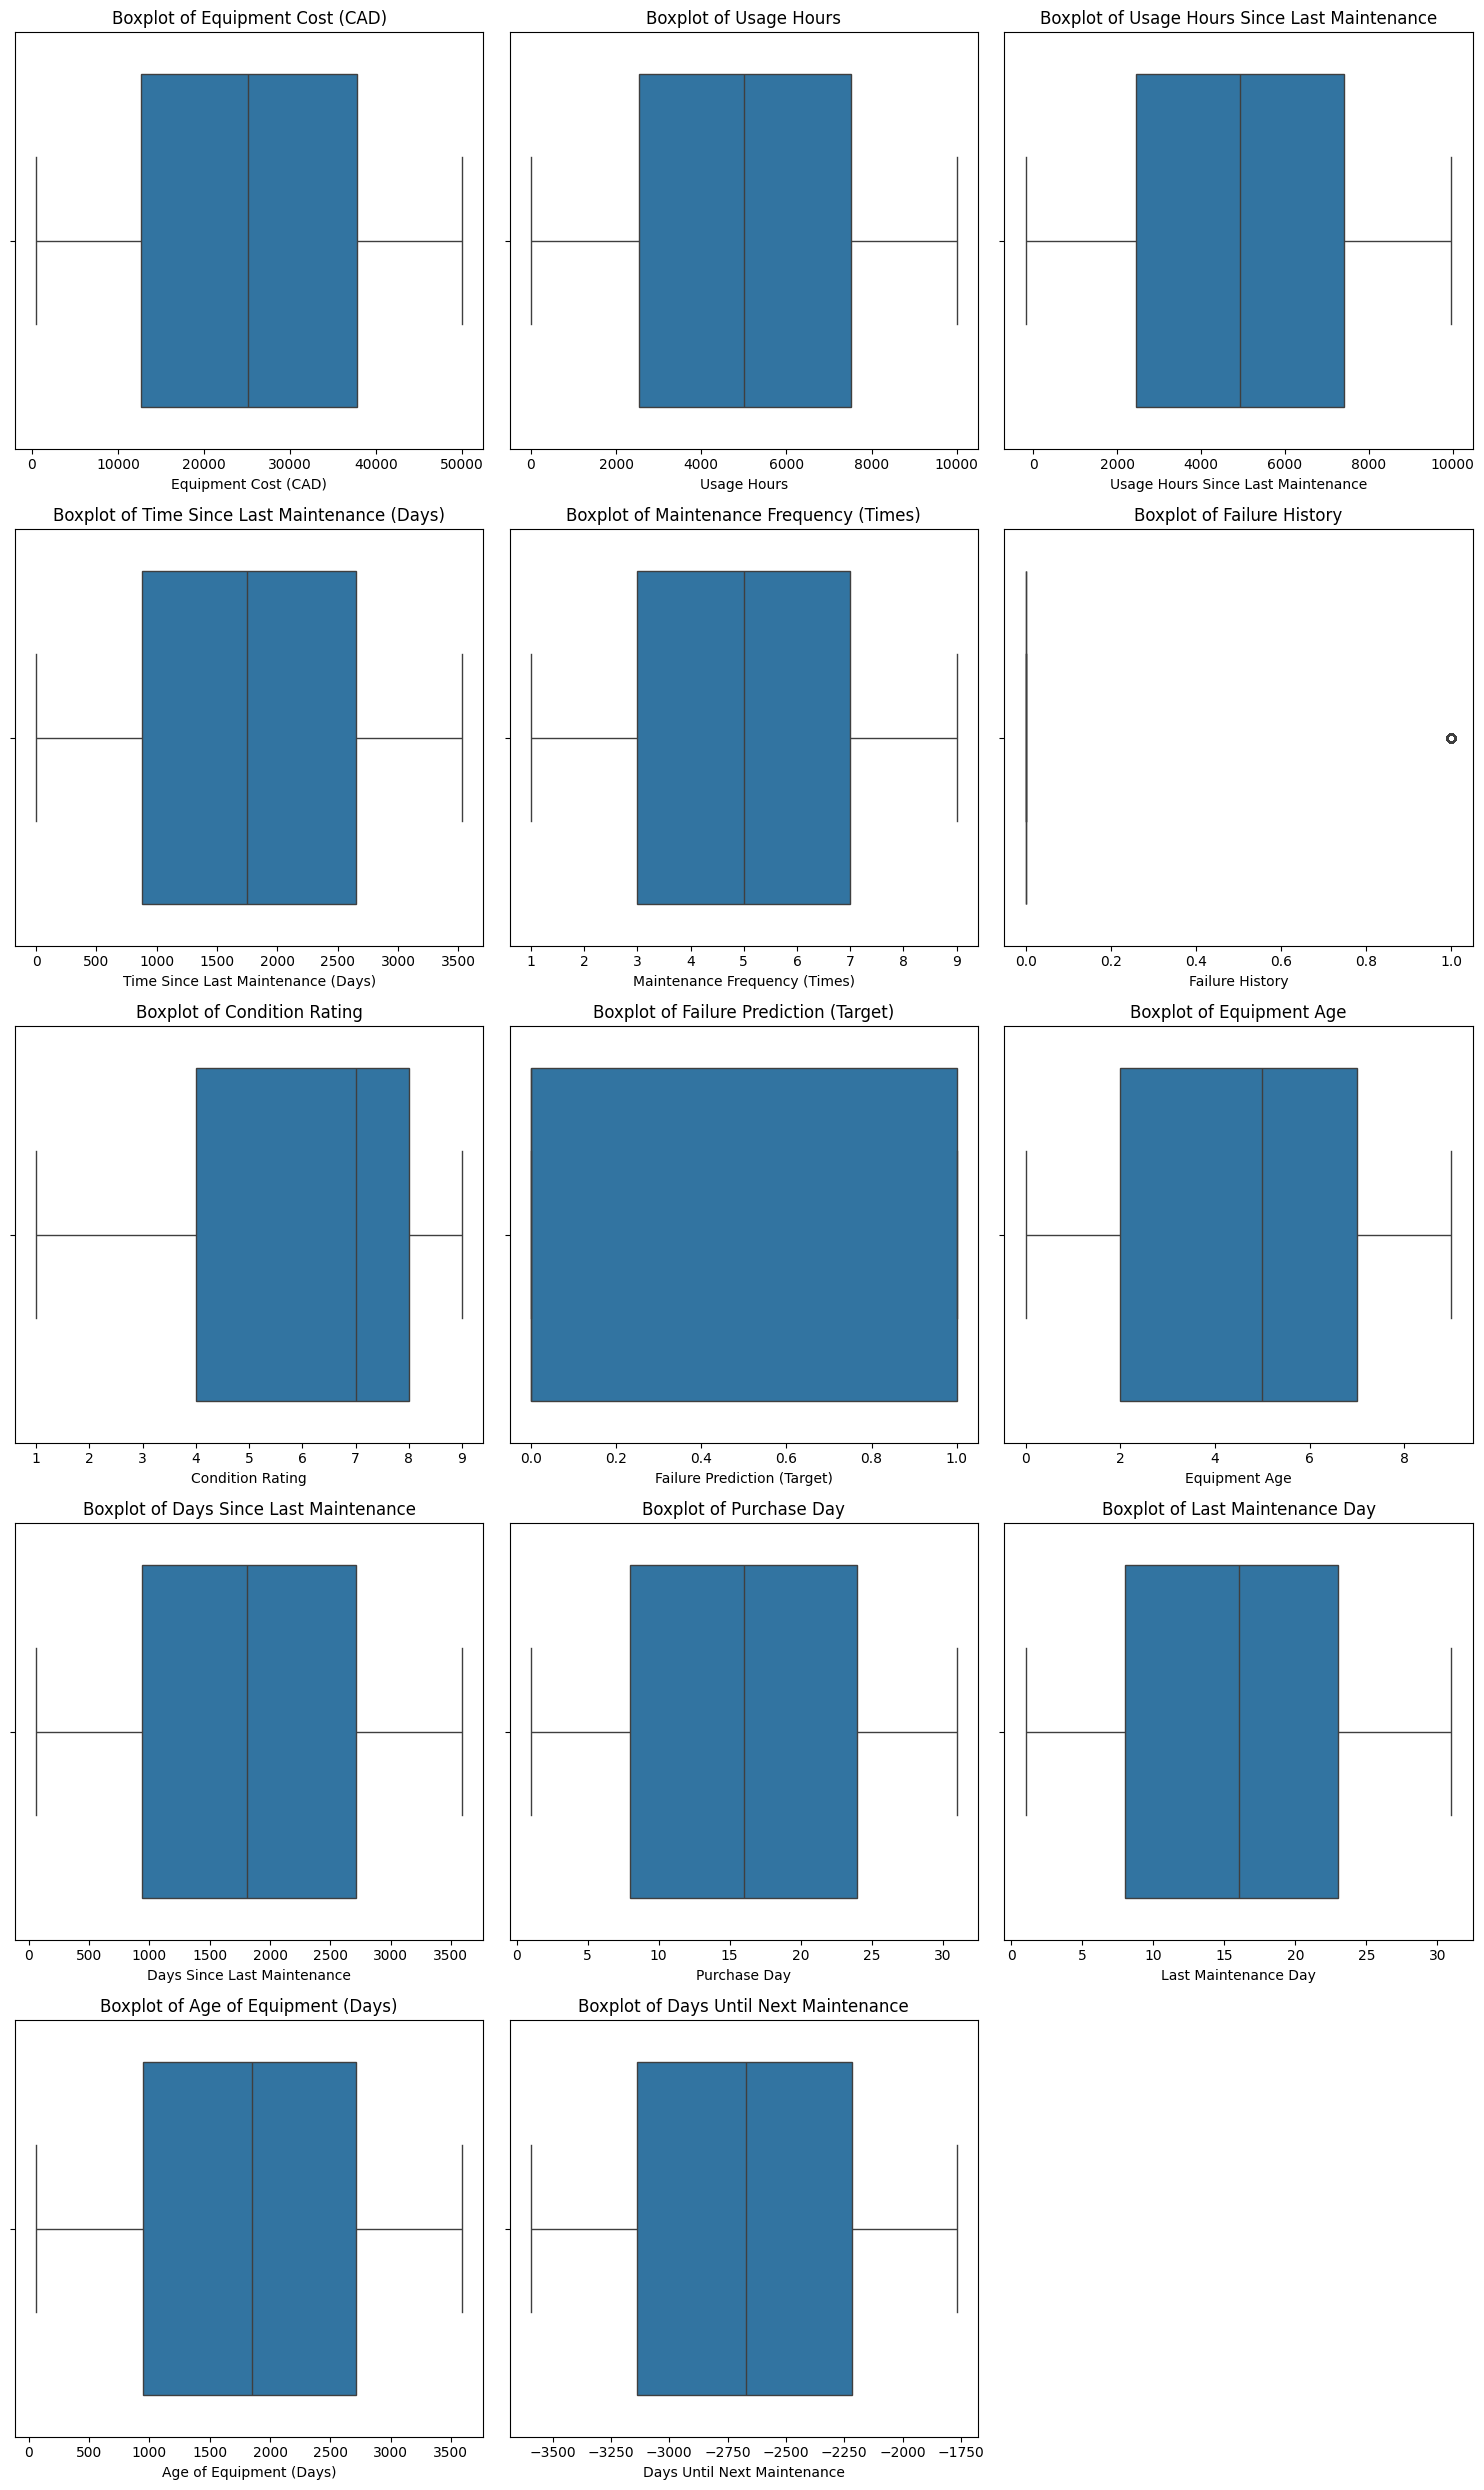

Outliers detected at row-column indices (Z-Score > 3): (array([], dtype=int64), array([], dtype=int64))
Outliers detected using IQR method:
 Equipment Cost (CAD)                     0
Usage Hours                              0
Usage Hours Since Last Maintenance       0
Time Since Last Maintenance (Days)       0
Maintenance Frequency (Times)            0
Failure History                       1040
Condition Rating                         0
Failure Prediction (Target)              0
Equipment Age                            0
Days Since Last Maintenance              0
Purchase Day                             0
Last Maintenance Day                     0
Age of Equipment (Days)                  0
Days Until Next Maintenance              0
dtype: int64


In [22]:


# Visual Inspection: Boxplot for continuous numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of subplots needed
n_columns = len(numeric_columns)
n_rows = (n_columns // 3) + (n_columns % 3 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 5))  # Adjust the figure height based on the number of rows

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, 3, i)  # Create subplots dynamically based on the number of rows
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Statistical Method 1: Using Z-Score to detect outliers
from scipy import stats

# Set threshold for Z-Score
z_threshold = 3

# Calculate Z-scores for each numeric column
z_scores = np.abs(stats.zscore(data[numeric_columns].dropna()))

# Check where the Z-score is greater than the threshold
outliers_z = np.where(z_scores > z_threshold)

# Print which columns and rows have outliers
print(f"Outliers detected at row-column indices (Z-Score > {z_threshold}): {outliers_z}")

# Statistical Method 2: Using IQR to detect outliers
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers_iqr = ((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound))

# Display which columns have outliers
print("Outliers detected using IQR method:\n", outliers_iqr.sum())


MODEL PREPARATION

In [23]:
# Step 1: Drop datetime columns and any other non-numerical columns that are not needed
columns_to_drop = ['Purchase Date', 'Last Maintenance Date', 'Next Maintenance Due Date', 'Warranty Expiry Date', 'Equipment ID']
X = data.drop(columns=columns_to_drop + ['Failure Prediction (Target)'], axis=1)
y = data['Failure Prediction (Target)']

# Step 2: Encode categorical columns (if any remain) using LabelEncoder
# Identify categorical columns (you can adjust this part if you have more categorical columns)
categorical_columns = X.select_dtypes(include=['object']).columns

# Use LabelEncoder to convert categorical columns to numeric
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

# Step 3: Ensure all columns are now numeric
print("Column data types after conversion:\n", X.dtypes)

Column data types after conversion:
 Equipment Type                          int32
Maintenance Status                      int32
Equipment Cost (CAD)                  float64
Usage Hours                             int64
Location                                int32
Supplier                                int32
Usage Hours Since Last Maintenance      int64
Time Since Last Maintenance (Days)      int64
Maintenance Frequency (Times)           int64
Failure History                         int64
Condition Rating                        int64
Equipment Age                           int64
Days Since Last Maintenance             int64
Purchase Month                          int32
Purchase Day                            int32
Last Maintenance Month                  int32
Last Maintenance Day                    int32
Age of Equipment (Days)                 int64
Days Until Next Maintenance             int64
dtype: object
